In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



<h1>Load the Dataset</h1>

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')

# Show first few rows
print(df.head())


   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  


<h1>Explore and Clean the Data</h1>

In [9]:
# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values as needed
df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB
None
                id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
mi

<h1>Average Purchase value</h1>

In [8]:
category_stats = df.groupby('preferred_category').agg({
    'last_purchase_amount': 'mean',
    'purchase_frequency': 'mean',
    'income': 'mean'
}).rename(columns={
    'last_purchase_amount': 'Avg Purchase Amount',
    'purchase_frequency': 'Avg Frequency',
    'income': 'Avg Income'
}).round(2)

print(category_stats)


                    Avg Purchase Amount  Avg Frequency  Avg Income
preferred_category                                                
Clothing                         489.65          25.68    89350.01
Electronics                      496.63          26.43    89111.34
Groceries                        487.28          27.16    87691.37
Home & Garden                    505.60          26.45    88900.51
Sports                           481.95          27.11    87563.20


<h1>Visualization 
</h1>

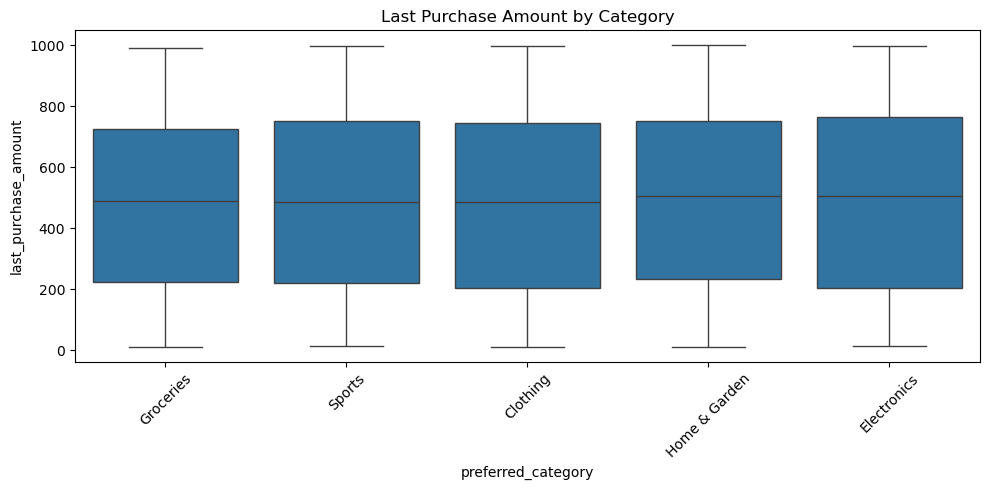

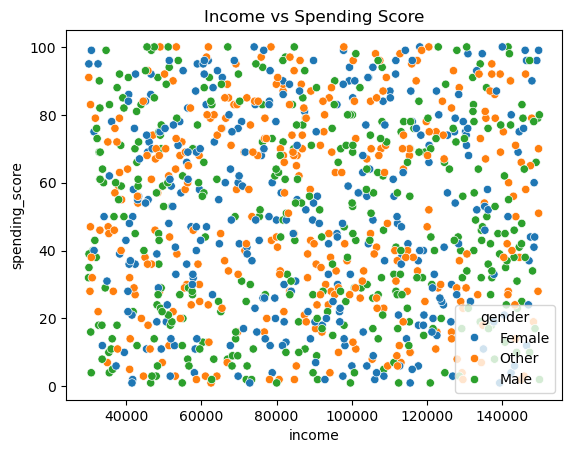

In [7]:


# Boxplot of last purchase by category
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='preferred_category', y='last_purchase_amount')
plt.xticks(rotation=45)
plt.title('Last Purchase Amount by Category')
plt.tight_layout()
plt.show()

# Income vs Spending Score
sns.scatterplot(data=df, x='income', y='spending_score', hue='gender')
plt.title("Income vs Spending Score")
plt.show()


<h1>Customer Segmentation (K-Means)</h1>

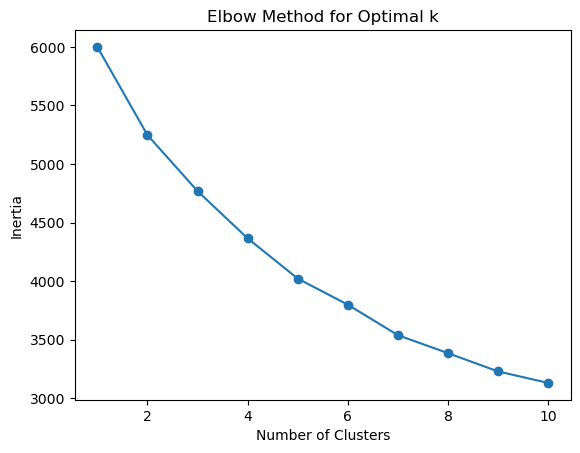

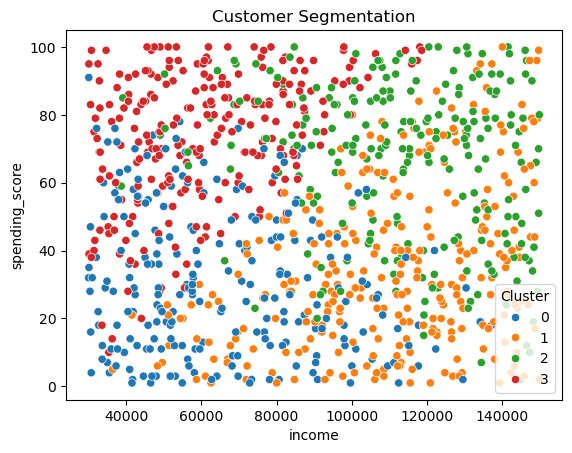

               age         income  spending_score  membership_years  \
Cluster                                                               
0        46.157447   65980.804255       30.863830          4.595745   
1        42.212329  109843.976027       35.493151          5.065068   
2        45.478261  113556.547826       66.134783          6.517391   
3        41.769547   60917.135802       73.485597          5.806584   

         purchase_frequency  last_purchase_amount  
Cluster                                            
0                 24.506383            745.858766  
1                 24.917808            243.505514  
2                 32.543478            725.016870  
3                 25.004115            325.985062  


In [17]:


# Select numerical features for clustering
features = ['age', 'income', 'spending_score', 'membership_years',
            'purchase_frequency', 'last_purchase_amount']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method (optional)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply KMeans with chosen k (e.g., 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (e.g., Income vs Spending Score)
sns.scatterplot(data=df, x='income', y='spending_score', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation')
plt.show()

# Optional: View cluster summaries
print(df.groupby('Cluster')[features].mean())


<h1>Segment Insights</h1>

 Cluster | Segment Type                 | Key Characteristics                                                          
 0        | **High Value Loyalists**     |  High income, high spending score,                                                 long membership, frequent purchases     
1          | **Young Spenders**           | Younger customers, moderate                                                        income, high spending, new members         
 2         | **Low Engagement Customers** | Low purchase frequency, low spending,                                              short membership, low last purchase 
 
 3          | **Wealthy but Cautious**     | 🧐 High income, low spending score,                                               low frequency, infrequent purchases      
